In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

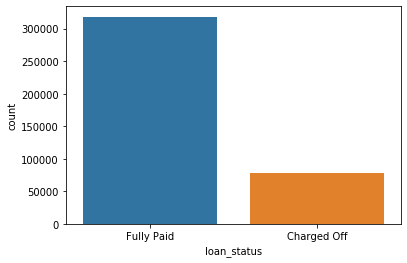

In [4]:
sns.countplot(x='loan_status', data=df)

unbalanced problem

Fraud and spam type data

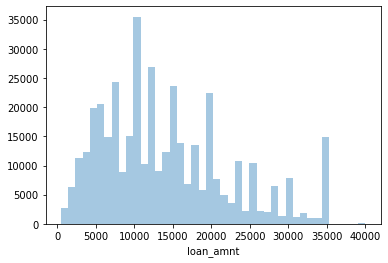

In [5]:
sns.distplot(df['loan_amnt'], kde=False, bins=42)

Loans happening at standard amounts

In [6]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

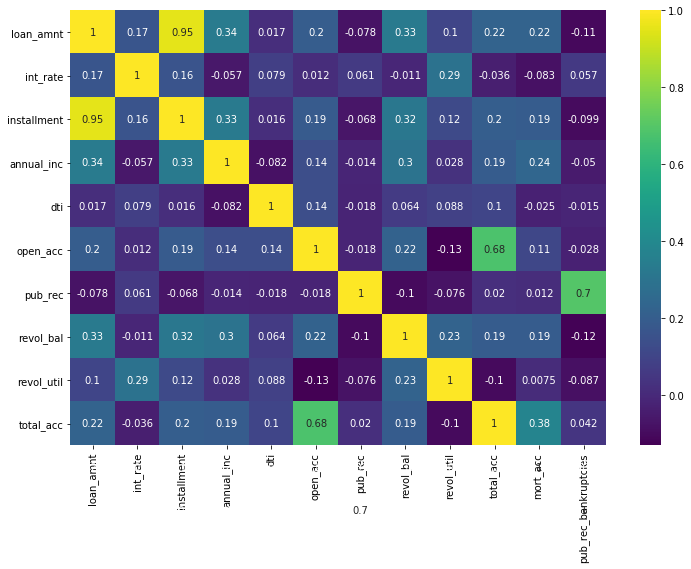

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(10,0)

Perfect corrolation along diag.

loan_amnt has good corrolation with installment

In [8]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

Gives info on certain feature when called

In [9]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [10]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


^^ proves that 2 features are directly corrolated, which is obvious

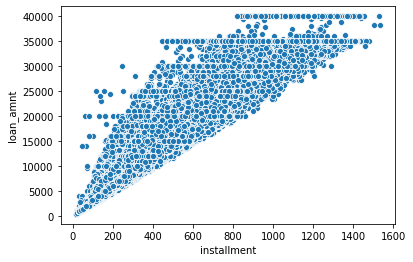

In [11]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Can see the corrolation more directly

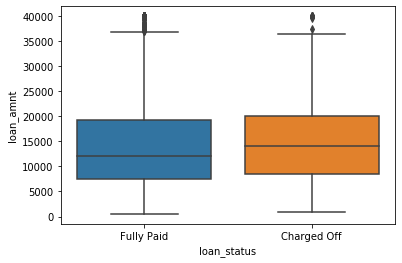

In [12]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)


Trying to determine if there is any relation between loans with higher amounts and lower amounts

^^ not a good indicator to use

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Shows numbers of above box plot for easier understanding

In [14]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [15]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

^^ sub_grade hold actual grade in itself

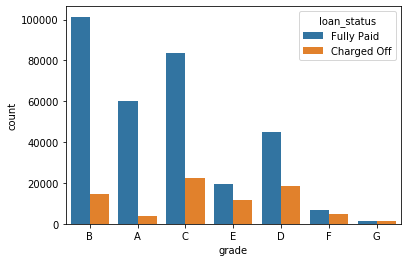

In [16]:
sns.countplot(x='grade', data=df,hue='loan_status')

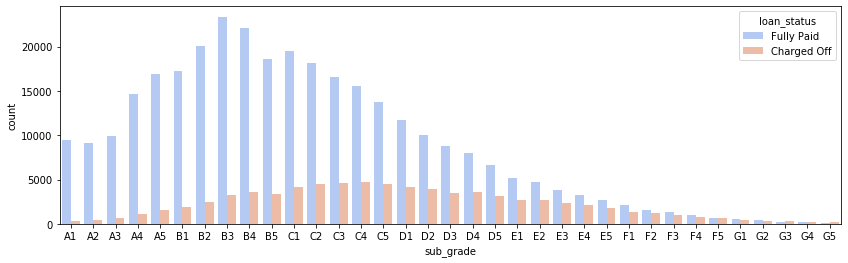

In [17]:
plt.figure(figsize=(14,4))
subgrade_order = sorted(df['sub_grade'].unique()) #reordering subgrades
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm',hue='loan_status')

Lower grades have the similar given loan amount to write off rate, potentially not worth giving loans to that group?

F&G subgrades don't get paid back that well ==> isolate those

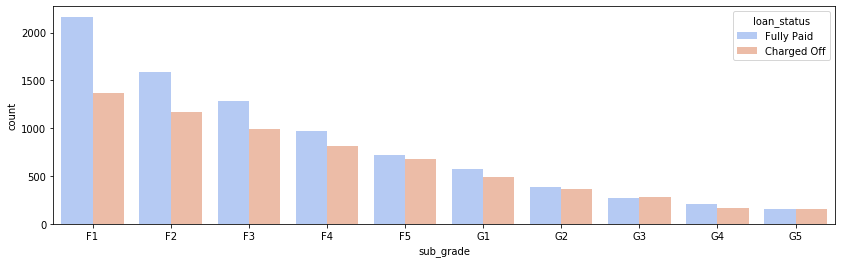

In [18]:
f_and_g = df[(df['grade'] == 'G') |
            (df['grade'] == 'F')]

plt.figure(figsize=(14,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique()) 
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order, palette='coolwarm',hue='loan_status')

In [19]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off' : 0})

In [20]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Creating new column to see if loans are repaid or not

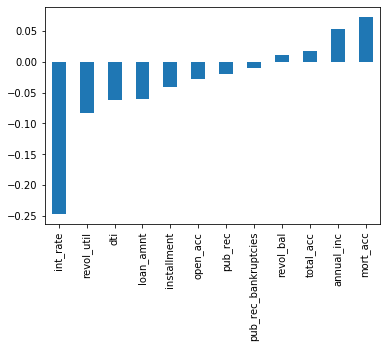

In [21]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

which number features have the highest corrolation with the labels

dropping loan_repaid since its useless and will show perfect corrolation

In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [23]:
len(df)

396030

In [24]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

finding out how many missing point there are in the data set

In [25]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

getting % of missing data

In [26]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [27]:
df['emp_title'].nunique()

173105

seeing how many unique titles we have

too many missing info to add dummy data

In [28]:
df = df.drop('emp_title', axis=1)

In [29]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
    
]

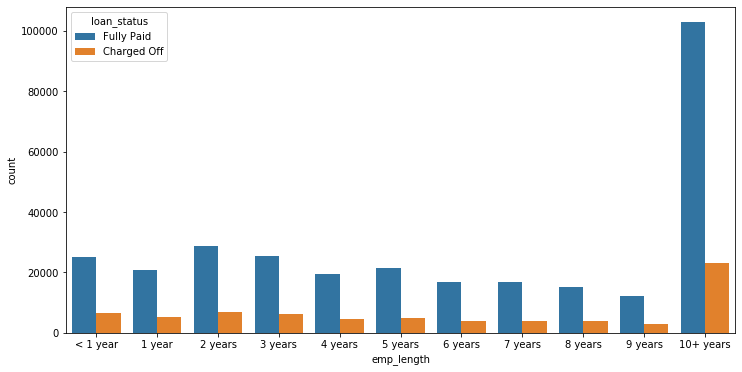

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, order=emp_length_order,
             hue='loan_status')

need to find ratio between blue and orange bars to get some more info (% charge of per cat.)

In [32]:
emp_co = df[df['loan_status'] =='Charged Off'].groupby('emp_length').count()['loan_status']

In [33]:
emp_fp = df[df['loan_status'] =='Fully Paid'].groupby('emp_length').count()['loan_status']

In [34]:
emp_perc = emp_co / (emp_fp+emp_co)

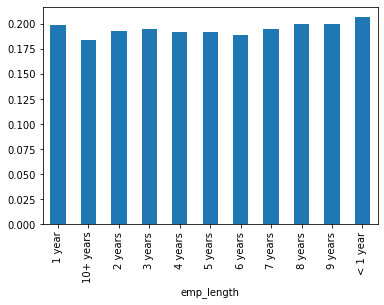

In [35]:
emp_perc.plot(kind='bar')

no extreme differences to keep feature

In [36]:
df = df.drop('emp_length', axis=1)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [40]:
df = df.drop('title', axis=1)

In [41]:
feat_info('mort_acc')

Number of mortgage accounts.


In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

how many mortgage accounts do people have in the dataset

In [43]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Trying to find a feature that would corrolate with mort_acc to fill in missing data from

could use total_acc to fill na

In [44]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

avg. mort_acc per total_acc

use this to fill missing data in mort_acc

In [45]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [46]:
def fill_in_mort_acc(total_acc, mort_acc) :
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc] #look up average value for mort_acc based off total_acc
    else:
        return mort_acc


function will look for account and if there is missing data it will fill it in from the avg. acc

In [47]:
df['mort_acc'] = df.apply(lambda x: fill_in_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [48]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

function worked, mort_acc is now 0 meaning there is no missing data

can drop other 2 rows as they are such a low %

In [49]:
df = df.dropna()

In [50]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

everything looks good, no more null values

In [51]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [52]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [53]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [54]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

converting months to numerical values so it can be used

In [55]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [56]:
df = df.drop('grade', axis = 1)

dropping grade column since from earlier analysis found out sub_grade has grade in it, therefore its just useless and redundent

In [57]:
dummies = pd.get_dummies(df[['sub_grade']],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1), dummies] , axis=1)

convert sub_grade to dummies and drop the org. column to prevent variable mix up

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

one-hot encoding was used

In [59]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose' ],axis=1), dummies] , axis=1)

same thing as above, these columns were good candidates from the data analysis results

In [60]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [61]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

not enough values in none or any to be worth having them there, mapped them into other

In [62]:
dummies = pd.get_dummies(df[['home_ownership']],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1), dummies] , axis=1)

In [63]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [64]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [65]:
dummies = pd.get_dummies(df[['zip_code']],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1), dummies] , axis=1)

In [66]:
df = df.drop('address', axis =1 )

got the zip dont need the address anymore

In [67]:
feat_info('issue_d')

The month which the loan was funded


^^ data leakage as we wont have an issue date for a new user and if we do that defeats the whole purpose of this model

In [68]:
df = df.drop('issue_d', axis = 1)

In [69]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [70]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

Convert the date in earliest_cr_line to be useful

In [72]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df = df.drop('loan_status',axis=1)

  already got a loan_repaid column dont need this one anymore

In [75]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [82]:
model = Sequential()



model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.3010 - val_loss: 0.2645
Epoch 2/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2658 - val_loss: 0.2639
Epoch 3/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2631 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2618 - val_loss: 0.2620
Epoch 5/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2611 - val_loss: 0.2617
Epoch 6/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2603 - val_loss: 0.2614
Epoch 7/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2599 - val_loss: 0.2617
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2597 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 3s 10us/sample - loss:

In [84]:
from tensorflow.keras.models import load_model

In [85]:
model.save('mortgagemodel.h5')

In [86]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

decent loss, not too much improvement, could add earlyStop and increasing epochs to improve learning

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
prediction = model.predict_classes(X_test)

In [91]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [92]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [93]:
317696 / len(df)

0.8038479931379817

^^ accuracy of model before anything, therefore only improved by a small 9%

pretty good on precision, lacking on recall, not too good of a f-1 score

In [94]:
confusion_matrix(y_test, prediction)

array([[ 6918,  8740],
       [  151, 63235]])

misclassifing a decent amount of 0 points

In [96]:
import random
random.seed(34)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt          8000.00
term                 36.00
int_rate             10.16
installment         258.74
annual_inc        41000.00
                    ...   
zip_code_30723        0.00
zip_code_48052        0.00
zip_code_70466        0.00
zip_code_86630        0.00
zip_code_93700        0.00
Name: 277889, Length: 78, dtype: float64

Creating new customer to just test the model

In [98]:
new_customer= scaler.transform(new_customer.values.reshape(1,78))

In [99]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [100]:
df.iloc[random_ind]['loan_repaid']

1.0

Conclusion: model did predict the right outcome for the customer